In [1]:
import numpy as np
import cv2
import os
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

C:\Users\manasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\manasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\manasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\manasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [2]:
dataset=r'C:\Users\manasa\Downloads\projects\chest x ray classification\Data'

In [3]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
#3e-4 is the best learning rate for adam

In [4]:
args={}
args["dataset"]=dataset

In [5]:

iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image pathas
    # -2 because we just need the value(normal,covid) stored at -2 position and no need of other information
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
#maximum pixel value is 255 for every image and we should keep all images should be in in a range from 0 to 255
labels = np.array(labels)

In [7]:
Data_Dir = "Data//"

In [8]:

Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


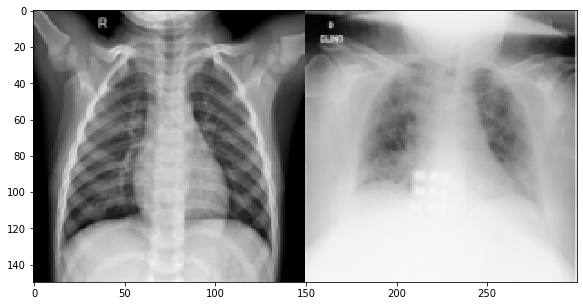

Normal Chest X-ray Vs Covid-19 Chest X-ray


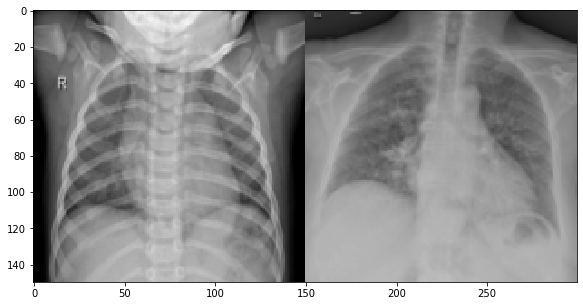

Normal Chest X-ray Vs Covid-19 Chest X-ray


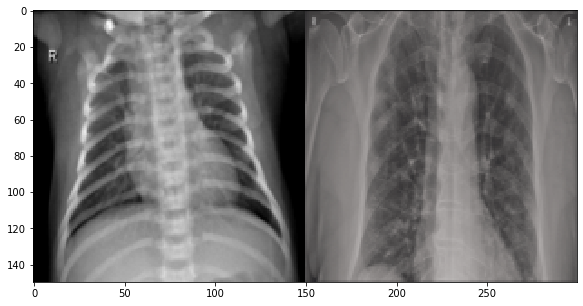

Normal Chest X-ray Vs Covid-19 Chest X-ray


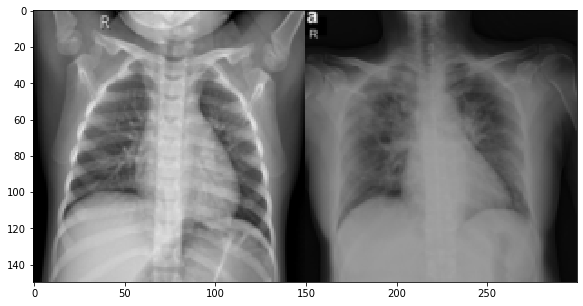

Normal Chest X-ray Vs Covid-19 Chest X-ray


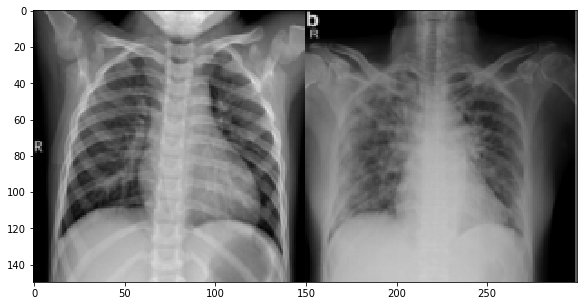

In [11]:
import skimage #scikit-image is a collection of algorithms for image processing and computer vision
#from skimage.transform import resize

def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [12]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")
#rotate the image by 15% and we get a new image

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

Image data generator- It artificially expands the size of the training dataset by creating modified version of the images in dataset
 
 
 y train is the label of x train 


Cateforical -convert array of labeled data to one hot vector(1 or 0)



stratify means classify
Stratify parameter makes a split so that the proportion of values in the samples produced will be the same as the proportion of values in provided for the parameter stratify
eg: if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split will have 25% of zeros, and 75% of 1s 

In [13]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
#what ever output you recieve will be connected with the headmodel
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
#hmodel layer input will be average of the output of previous pre-trained model
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
#to add hidden layer
hModel = Dropout(0.5)(hModel)
#prevents overfitting
hModel = Dense(2, activation="softmax")(hModel)
#we have 2 outputs-normal, corona
model = Model(inputs=bModel.input, outputs=hModel)
#Model groups layers into an object with training and inference features
for layer in bModel.layers:
    layer.trainable = False
#to stop the training for pretrained model 

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 130s 2us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


We are just going to use a pretrained model and add a cnn layer to it inorder to predict output


imagenet is an opensource repository of images consisting of 1000 classes with 1.5 million images


the “include_top” argument can be set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained

In [14]:
bModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

C:\Users\manasa\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


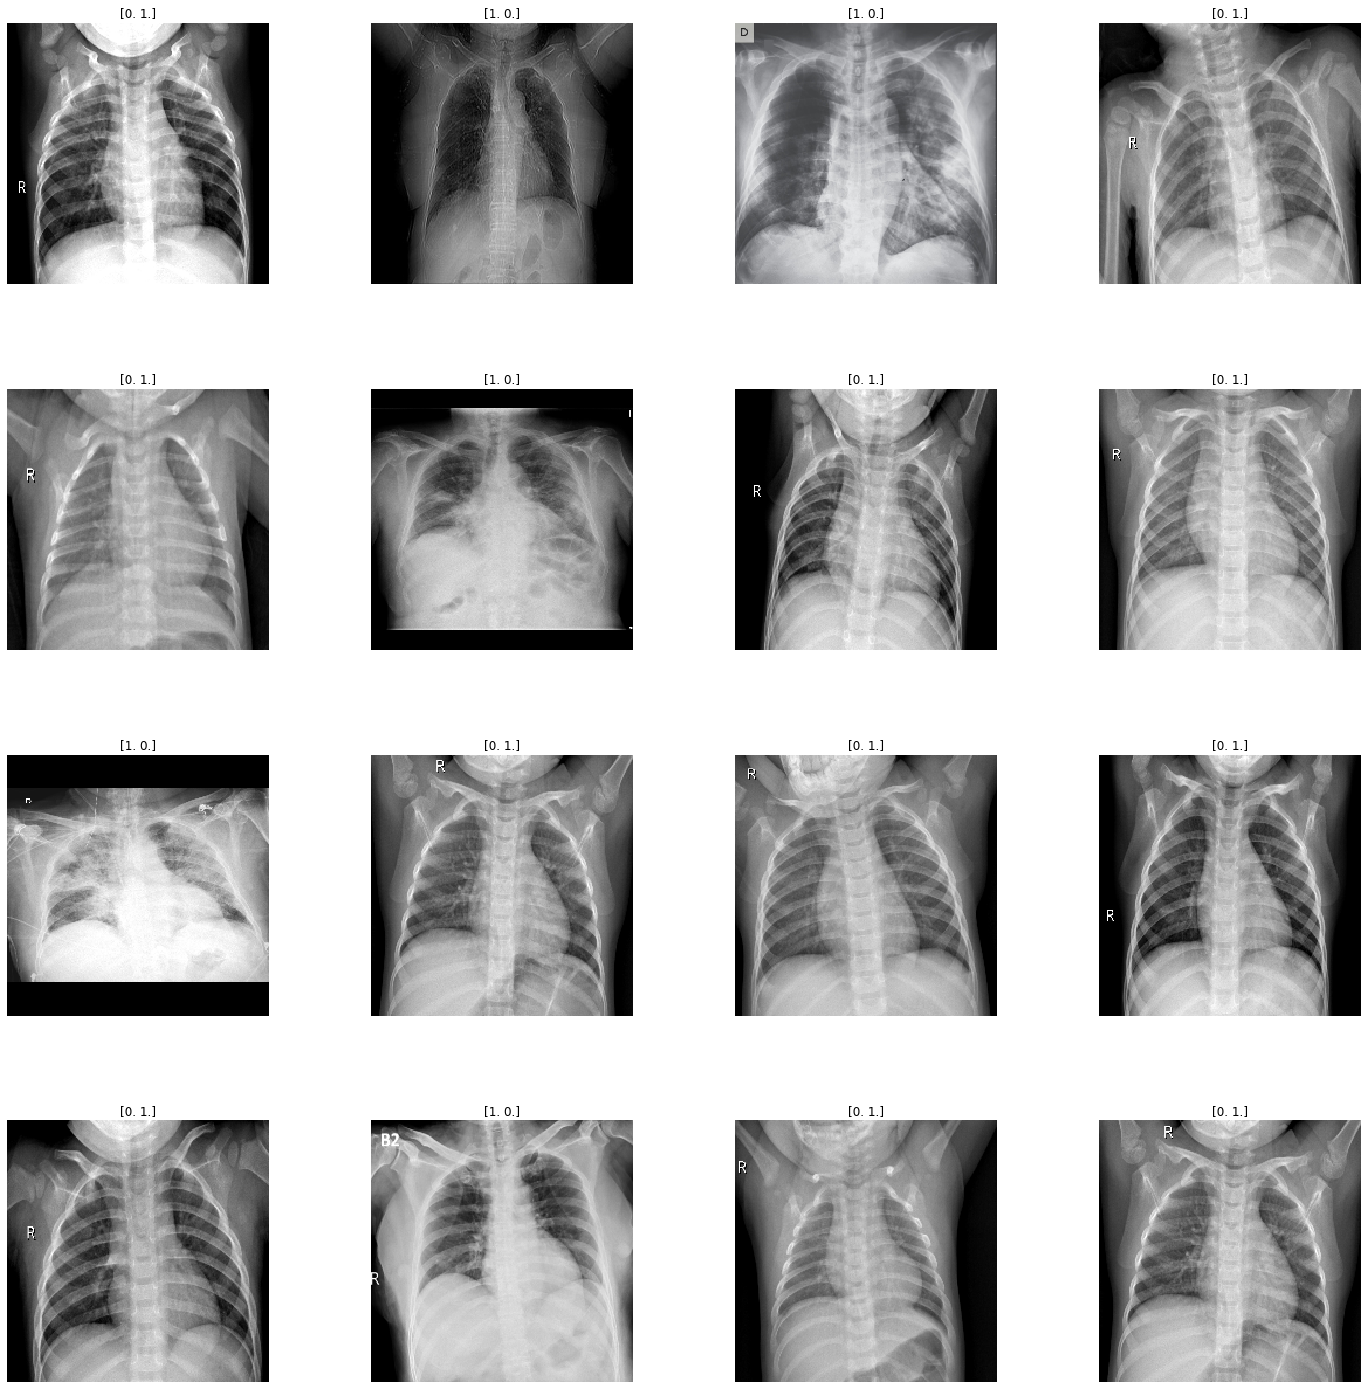

In [16]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [17]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
#to update network weights iteratived based in training data
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
#here only normal and corona so we use binary crossentropy
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20/20 [==============================] - 96s 5s/step - loss: 0.7559 - acc: 0.5312 - val_loss: 0.5665 - val_acc: 0.7500
Epoch 2/10
20/20 [==============================] - 70s 3s/step - loss: 0.5242 - acc: 0.7563 - val_loss: 0.4252 - val_acc: 0.9500
Epoch 3/10
20/20 [==============================] - 84s 4s/step - loss: 0.3757 - acc: 0.9062 - val_loss: 0.3418 - val_acc: 0.9250
Epoch 4/10
20/20 [==============================] - 72s 4s/step - loss: 0.2889 - acc: 0.9312 - val_loss: 0.2525 - val_acc: 0.9750
Epoch 5/10
20/20 [==============================] - 61s 3s/step - loss: 0.2172 - acc: 0.9688 - val_loss: 0.2082 - val_acc: 0.9750
Epoch 6/10
20/20 [==============================] - 62s 3s/step - loss: 0.1952 - acc: 0.9688 - val_loss: 0.1767 - val_acc: 0.9750
Epoch 7/10
20/20 [==============================] - 62s 3s/step - loss: 0.1548 - acc: 0.9750 - val_loss: 0.1377 - val_acc: 1.0000
Epoch 8/10
20/20 [=======

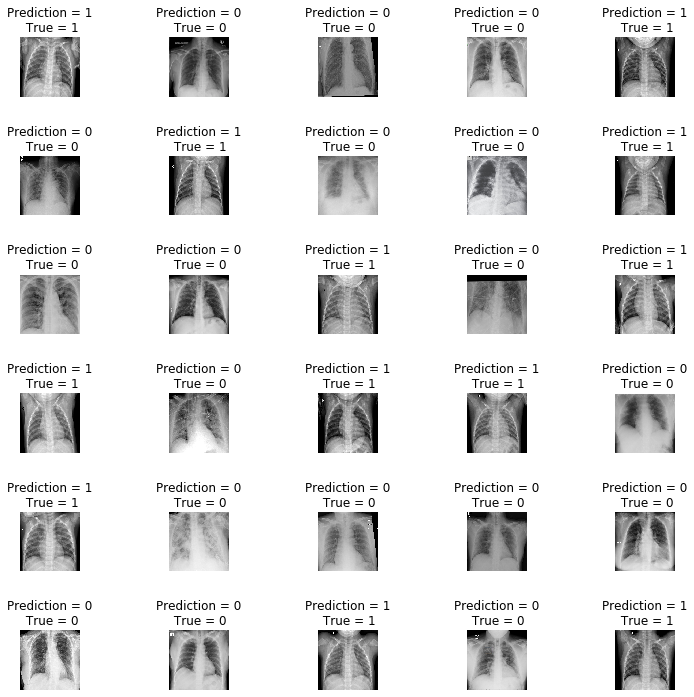

In [20]:
L = 6 #6rows
W = 5 #columns
fig, axes = plt.subplots(L, W, figsize = (12, 12)) #size of the image
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W): #output 6*5=30images
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [21]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

1.0

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


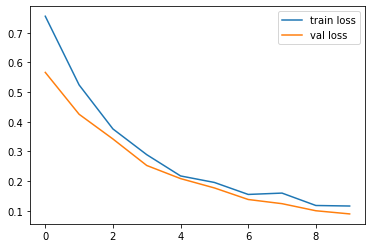

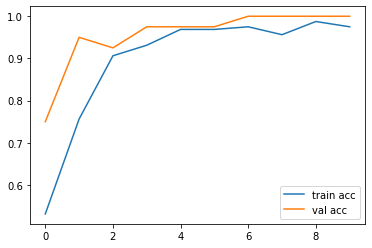

In [26]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['acc'], label='train acc')
plt.plot(R.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [27]:
model.save('Covid_model.h5')

Using TensorFlow backend.


Prediction: Corona


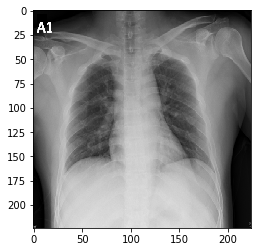

In [28]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


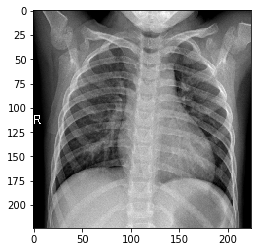

In [29]:

img = image.load_img('Data/Normal/IM-0162-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
#which every argument is maximum(argmax)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')